In [115]:
import numpy as np
import pandas as pd
from pylab import mpl,plt
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

C:\Users\matty\AppData\Local\Temp\ipykernel_3904\2173198595.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [116]:
def f(x):
    return np.sin(x)+0.5*x


In [117]:
def create_plot(x,y,styles,labels,axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i],y[i],styles[i],label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [118]:
x=np.linspace(-2*np.pi,2*np.pi)

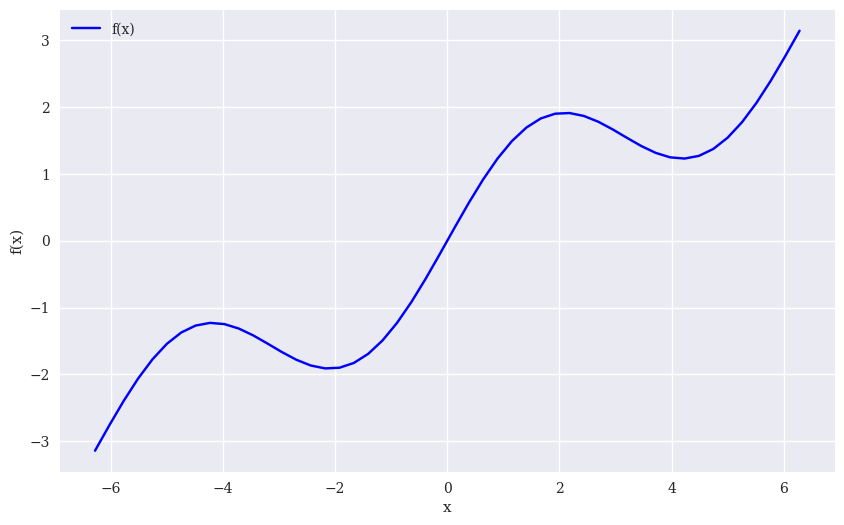

In [119]:
create_plot([x],[f(x)],['b'],['f(x)'],['x','f(x)'])

In [120]:
res=np.polyfit(x,f(x),deg=2,full=True)
res

(array([ 5.51986248e-19,  4.28841952e-01, -1.50023194e-16]),
 array([21.03238686]),
 3,
 array([1.3211945, 1.       , 0.5044255]),
 1.1102230246251565e-14)

In [121]:
ry=np.polyval(res[0],x)

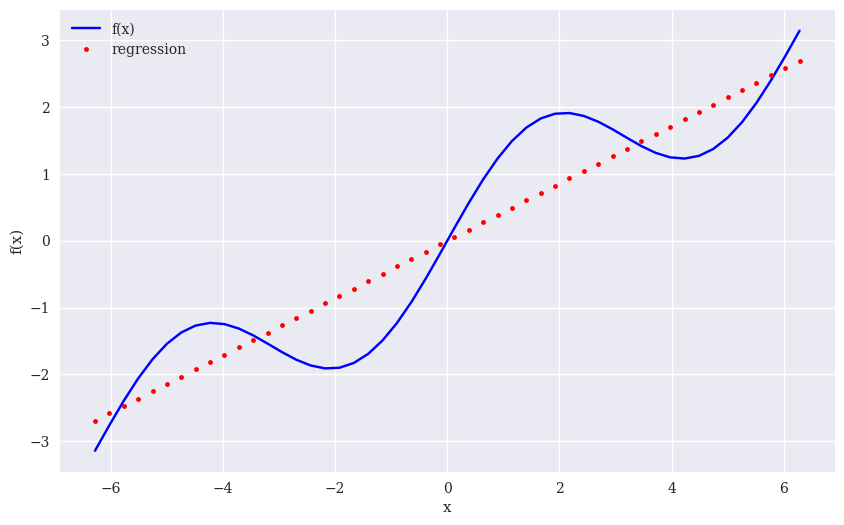

In [122]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [123]:
reg=np.polyfit(x,f(x),deg=5)
ry=np.polyval(reg,x)


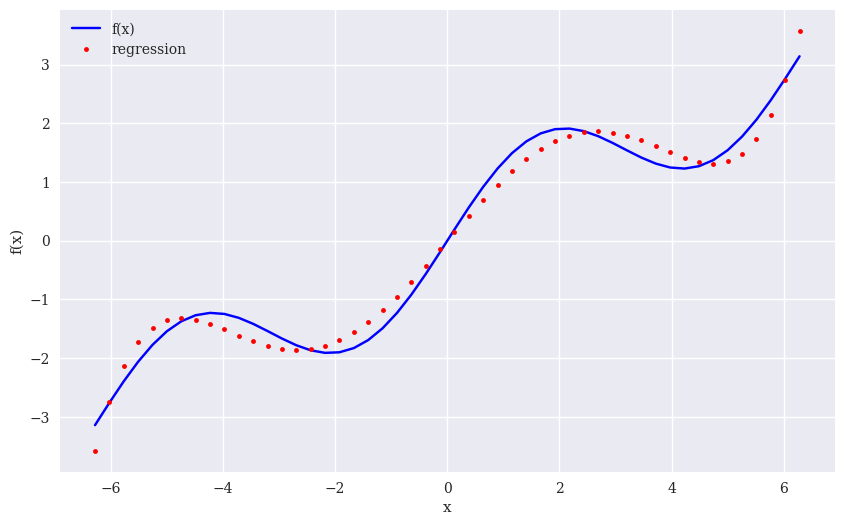

In [124]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [125]:
reg=np.polyfit(x,f(x),7)
ry=np.polyval(reg,x)
np.allclose(f(x),ry)



False

In [126]:
np.mean((f(x)-ry)**2)

0.0017769134759517593

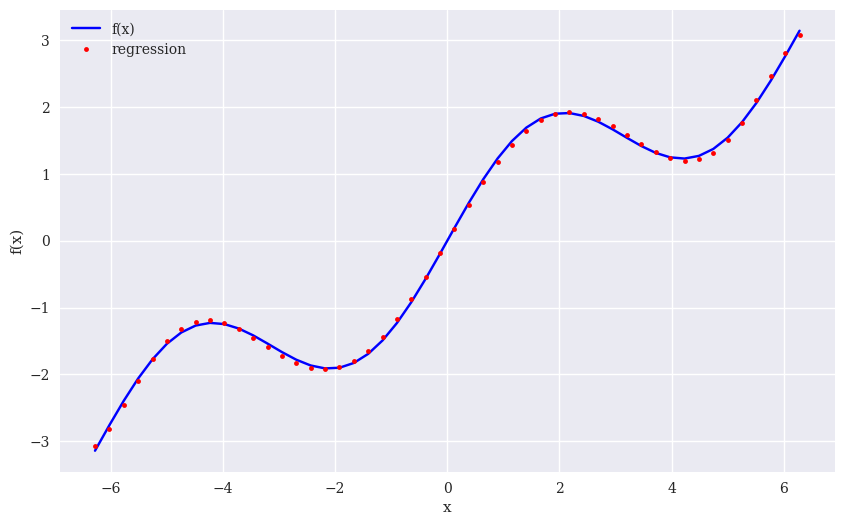

In [127]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [128]:
matrix=np.zeros((3+1,len(x)))
matrix[3,:]=x**3
matrix[2,:]=x**2
matrix[1,:]=x
matrix[0,:]=1

In [129]:
reg=np.linalg.lstsq(matrix.T,f(x),rcond=None)[0]

In [130]:
reg.round(4)

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [131]:
ry=np.dot(reg,matrix)

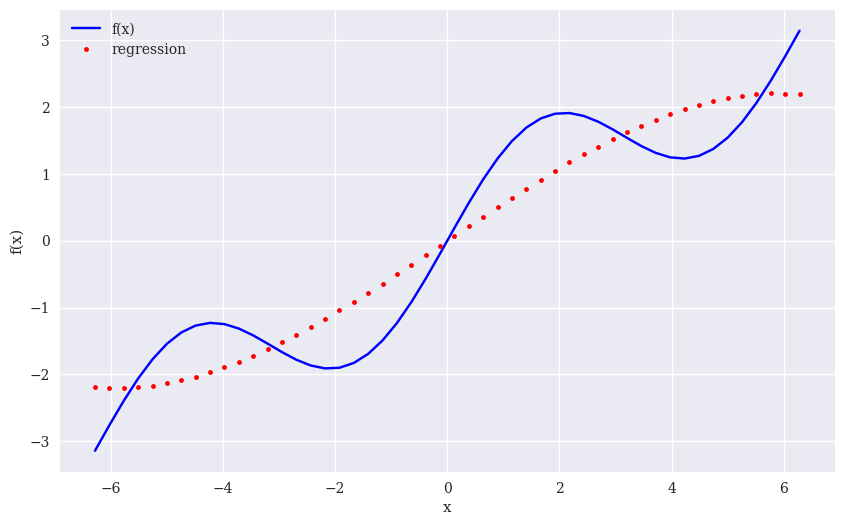

In [132]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [133]:
matrix[3,:]=np.sin(x)
reg=np.linalg.lstsq(matrix.T,f(x),rcond=None)[0]
reg.round(4)
ry=np.dot(reg,matrix)


In [134]:
np.allclose(f(x),ry)

True

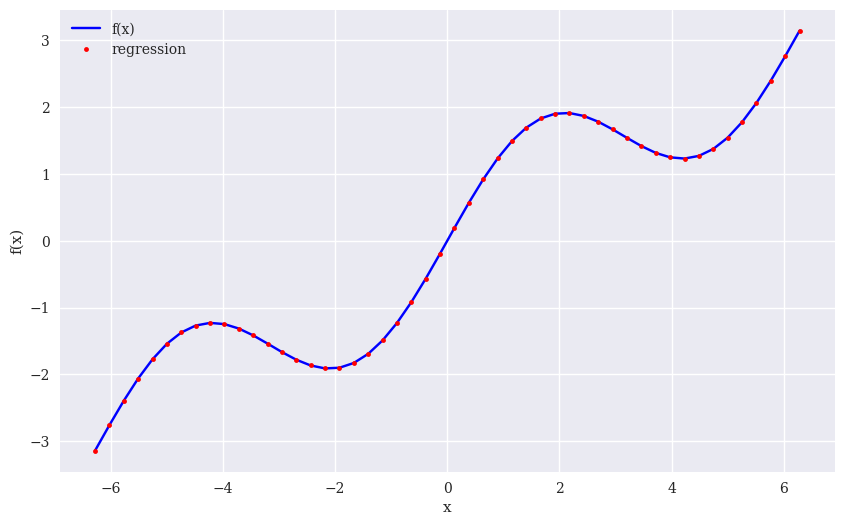

In [135]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [136]:
xn=np.linspace(-2*np.pi,2*np.pi,50)
xn=xn+0.15*np.random.standard_normal(len(xn))
yn=f(xn) + 0.25*np.random.standard_normal(len(xn))


In [137]:
reg=np.polyfit(xn,yn,7)
ry=np.polyval(reg,xn)

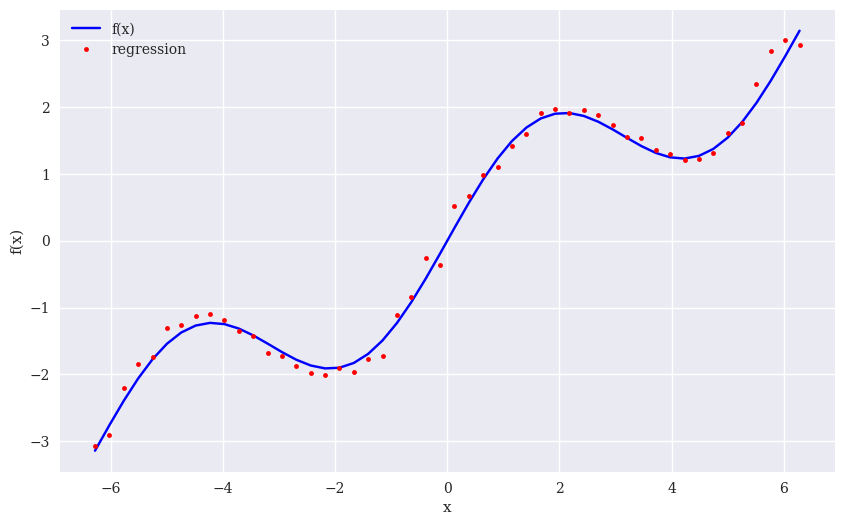

In [138]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [139]:
xu=np.random.rand(50)*4*np.pi-2*np.pi
yu=f(xu)

In [140]:
print(xu[:10].round(2))
print(yu[:10].round(2))


[-4.35 -1.33 -0.11  5.21  0.2   3.19  0.91  2.01 -2.07  4.83]
[-1.24 -1.63 -0.17  1.72  0.29  1.55  1.24  1.91 -1.91  1.42]


In [141]:
reg=np.polyfit(xu,yu,5)
ry=np.polyval(reg,xu)

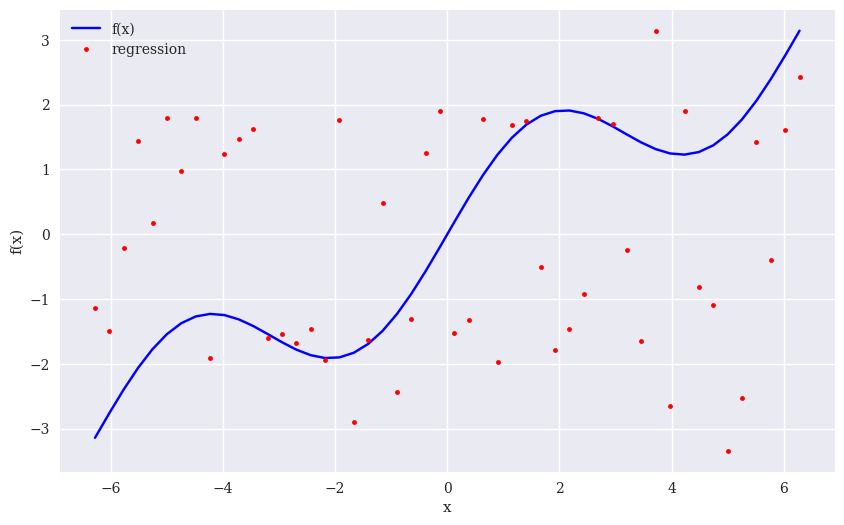

In [142]:
create_plot([x,x],[f(x),ry],['b','r.'],['f(x)','regression'],['x','f(x)'])

In [143]:
def fm(p):
    x,y=p
    return np.sin(x)+0.25*x+np.sqrt(y)+0.05*y**2

In [144]:
x=np.linspace(0,10,20)
y=np.linspace(0,10,20)
X,Y=np.meshgrid(x,y)

In [145]:
Z=fm((X,Y))
x=X.flatten()
y=Y.flatten()

In [146]:
from mpl_toolkits.mplot3d import Axes3D


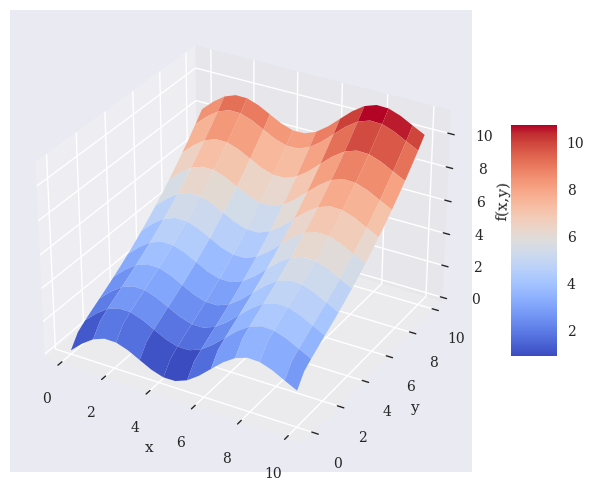

In [147]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap='coolwarm',linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)

In [148]:
matrix = np.zeros((len(x), 7))

matrix[:,6]=np.sqrt(y)               
matrix[:,5]=np.sin(x)
matrix[:,4]=y**2
matrix[:,3]=x**2
matrix[:,2]=y
matrix[:,1]=x
matrix[:,0]=1
                

In [149]:
RZ=np.dot(matrix,reg).reshape((20,20))


ValueError: shapes (400,7) and (6,) not aligned: 7 (dim 1) != 6 (dim 0)

In [150]:
import scipy.interpolate as spi

In [151]:
x=np.linspace(-2*np.pi,2*np.pi,25)


In [152]:
def f(x):
    return np.sin(x)+0.5*x

In [153]:
ipo=spi.splrep(x,f(x),k=1)

In [154]:
iy= spi.splev(x,ipo)

In [155]:
np.allclose(f(x),iy)

True

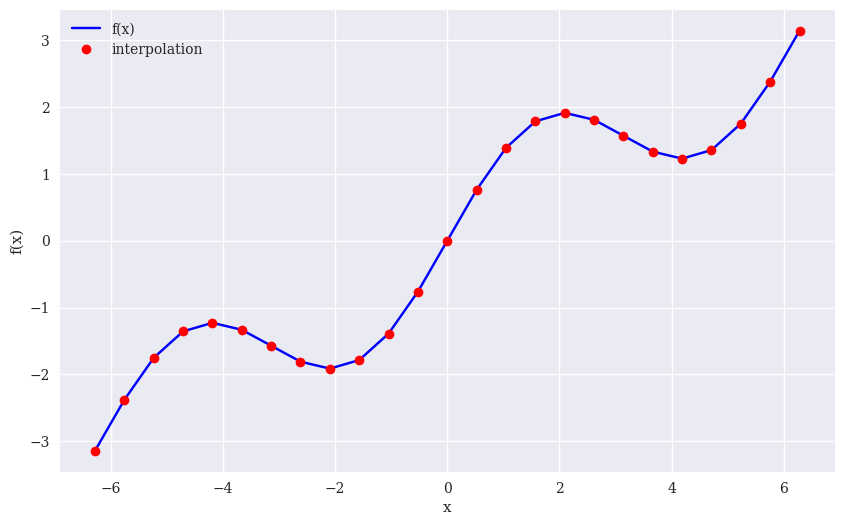

In [156]:
create_plot([x,x],[f(x),iy],['b','ro'],['f(x)','interpolation'],['x','f(x)'])

In [157]:
xd=np.linspace(1.0,3.0,50)
iyd=spi.splev(xd,ipo)

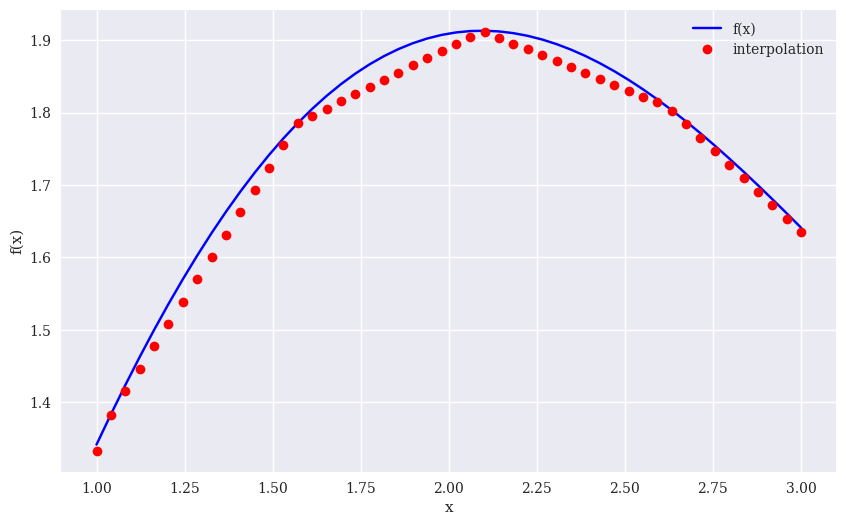

In [158]:
create_plot([xd,xd],[f(xd),iyd],['b','ro'],['f(x)','interpolation'],['x','f(x)'])

In [159]:
ipo=spi.splrep(x,f(x),k=3)
iyd=spi.splev(xd,ipo)

np.allclose(f(xd),iyd)

False

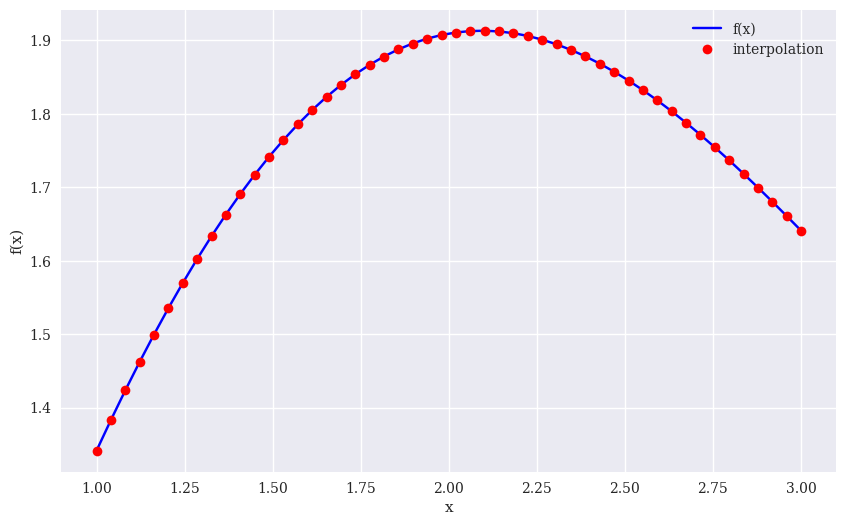

In [160]:
create_plot([xd,xd],[f(xd),iyd],['b','ro'],['f(x)','interpolation'],['x','f(x)'])

In [161]:
def fm(p):
    x,y=p
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)

In [162]:
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)
X,Y=np.meshgrid(x,y)
Z=fm((X,Y))

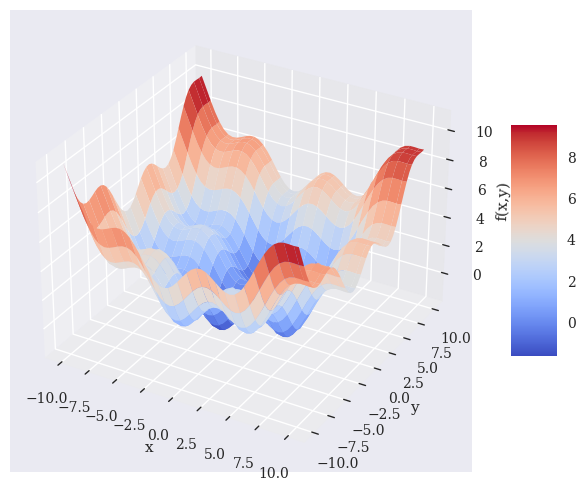

In [163]:
fig=plt.figure(figsize=(10,6))
ax= fig.add_subplot(projection='3d')
surf= ax.plot_surface(X,Y,Z, rstride=2,cstride=2,cmap='coolwarm',lw=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)

In [164]:
import scipy.optimize as sco


In [165]:
def fo(p):
    x,y=p
    z=np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x,y,z))
    return z

In [166]:
output=True
sco.brute(fo,((-10,10.1,5),(-10,10.1,5)),finish=None)

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [167]:
output=False
opt1 = sco.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)),finish=None)
opt1

array([-1.4, -1.4])

In [168]:
fm(opt1)

-1.7748994599769203

In [169]:
output=True
opt2=sco.fmin(fo,opt1,xtol=0.001,ftol=0.001,maxiter=15,maxfun=20)

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


C:\Users\matty\AppData\Local\Temp\ipykernel_3904\2855094857.py:2: RuntimeWarning:

Maximum number of function evaluations has been exceeded.



In [170]:
opt2

array([-1.42702972, -1.42876755])

In [171]:
fm(opt2)

-1.7757246992239009

In [172]:
output=False
sco.fmin(fo,(2.0,2.0),maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [173]:
import math

In [174]:
def Eu(p):
    s,b=p
    return -(0.5*math.sqrt(s*15+b*5)+0.5*math.sqrt(s*5+12*b))


In [175]:
cons=({'type': 'ineq','fun':lambda p: 100-p[0]*10-p[1]*10})

In [176]:
bnds=((0,1000),(0,1000))

In [177]:
result=sco.minimize(Eu,[5,5],method='SLSQP',bounds=bnds,constraints=cons)

In [178]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

In [179]:
import scipy.integrate as sci


In [180]:
def f(x):
    return np.sin(x)+0.5*x


In [181]:
x=np.linspace(0,10)
y=f(x)
a=0.5
b=9.5
Ix=np.linspace(a,b)
Iy=f(Ix)

In [182]:
from matplotlib.patches import Polygon

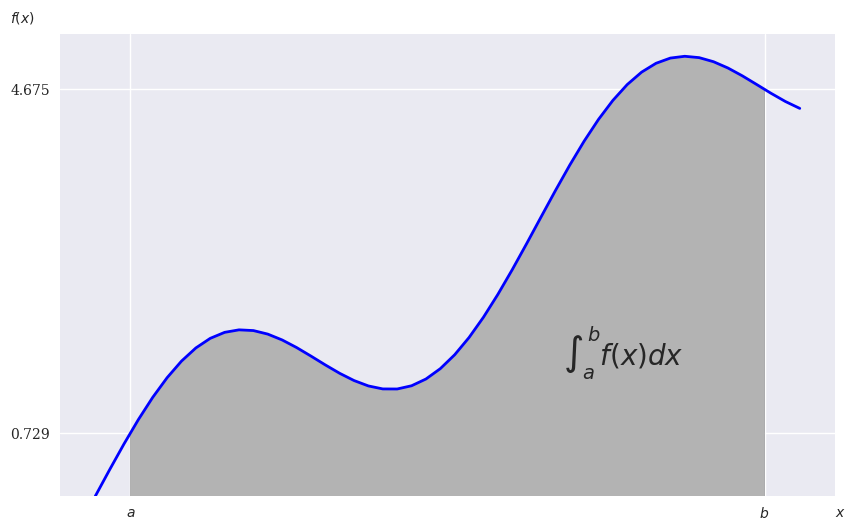

In [183]:
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(x,y,'b',lw=2)
plt.ylim(bottom=0)
Ix=np.linspace(a,b)
Iy=f(Ix)
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]
poly=Polygon(verts,facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75*(a+b),1.5,r"$\int_a^b f(x)dx$",horizontalalignment='center',fontsize=20)
plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$f(x)$')
ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([f(a),f(b)]);

In [184]:
import sympy as sy

In [185]:
x=sy.Symbol('x')
y=sy.Symbol('y')

In [186]:
type(x)

sympy.core.symbol.Symbol

In [187]:
sy.sqrt(x)

sqrt(x)

In [189]:
f=3*x+13-2+3*x
sy.simplify(f)

6*x + 11

In [190]:
sy.init_printing(pretty_print=False , use_unicode=False)

In [191]:
print(sy.pretty(f))

6*x + 11


In [192]:
print(sy.pretty(sy.sqrt(x)+0.5))

  ___      
\/ x  + 0.5


In [195]:
sy.solve(x**2-1)

[-1, 1]

In [196]:
sy.solve(x**2+y**2)

[{x: -I*y}, {x: I*y}]

In [201]:
a,b=sy.symbols('a b')
I=sy.Integral(sy.sin(x)+0.5*x,(x,a,b))
print(sy.pretty(I))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [202]:
int_func=sy.integrate(sy.sin(x)+0.5*x,x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [207]:
Fb=int_func.subs(x,9.5).evalf()
Fa=int_func.subs(x,0.5).evalf()


In [206]:
Fb

44.9675793366901

In [208]:
Fb-Fa

24.3747547180867

In [210]:
int_func.diff()

0.5*x + sin(x)

In [211]:
f=(sy.sin(x)+0.05*x**2+sy.sin(y)+0.05*y**2)

In [212]:
del_x=sy.diff(f,x)
del_x

0.1*x + cos(x)

In [213]:
del_y=sy.diff(f,y)
del_y

0.1*y + cos(y)

In [214]:
xo=sy.nsolve(del_x,-1.5)
xo

-1.42755177876459

In [215]:
yo=sy.nsolve(del_y,-1.5)
yo

-1.42755177876459

In [216]:
f.subs({x:xo,y:yo}).evalf()

-1.77572565314742